In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
import capstone

std: 1.0000000413701846e-05 0.07943046777743823
mean: 9.64231431443867 9.939798551600234
UCB:
0.167678-0.124215-0.121849-0.173708-0.622098-0.624935-0.251953-0.644802
Lonely:
0.178911-0.880362-0.010468-0.981338-0.035462-0.859875-0.135911-0.682169
Turbo:
0.202880-0.182466-0.141289-0.180236-0.726775-0.492916-0.269915-0.551102


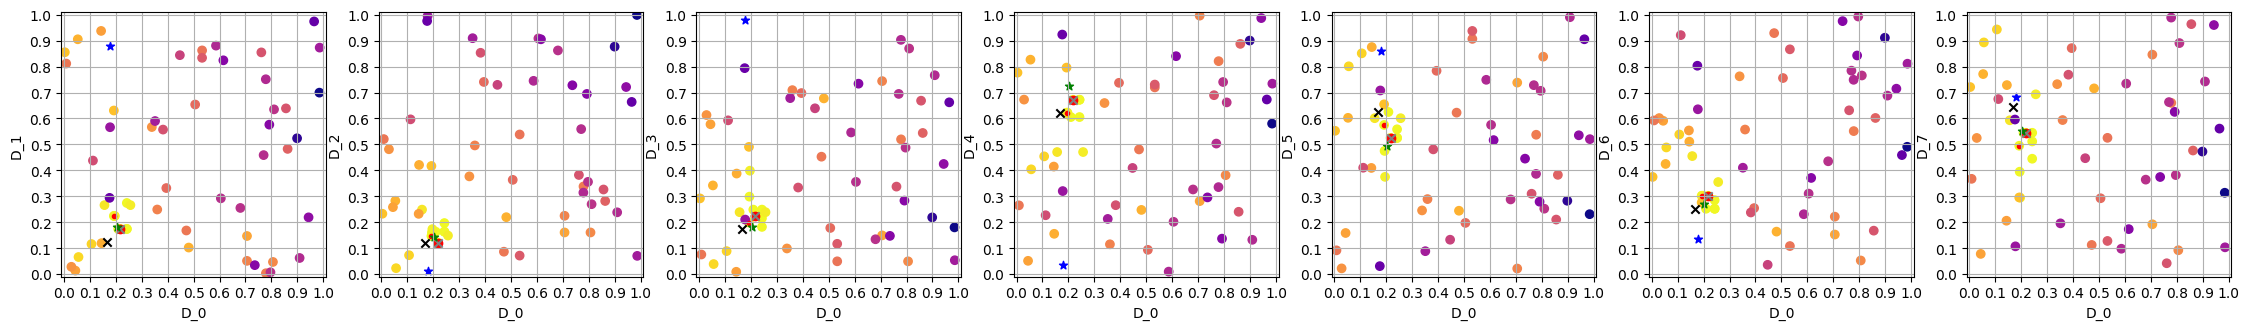

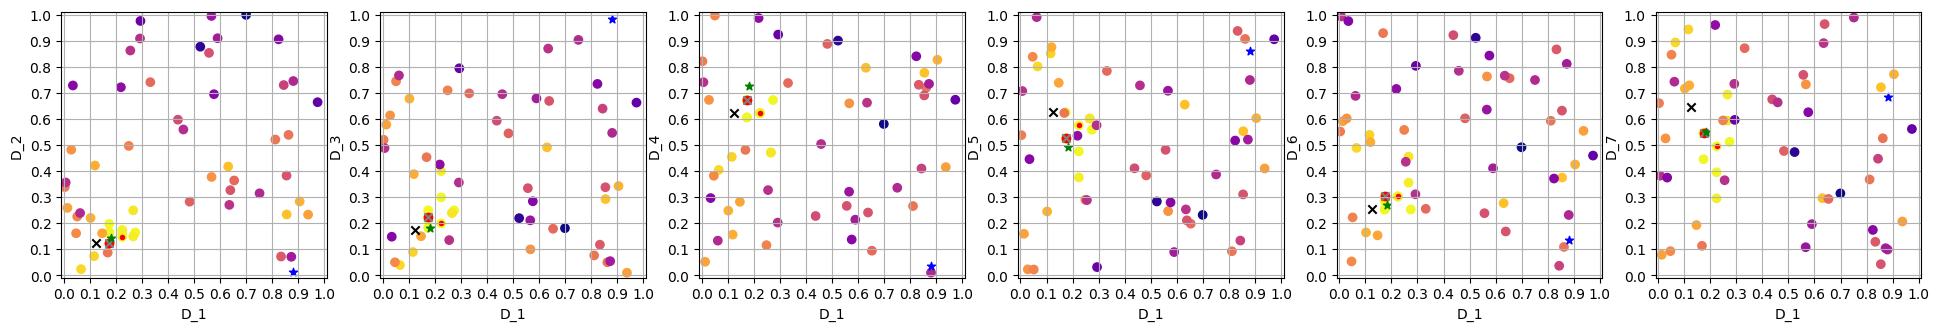

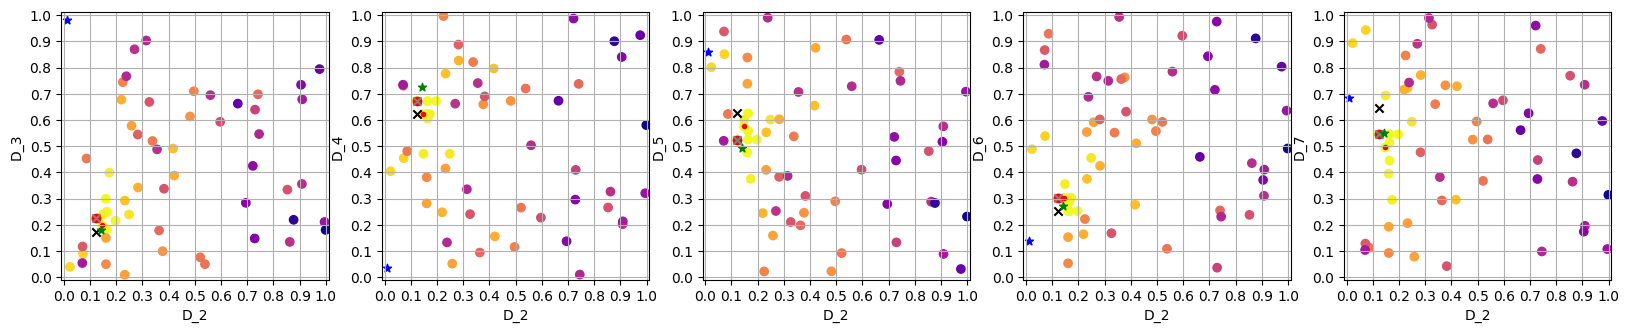

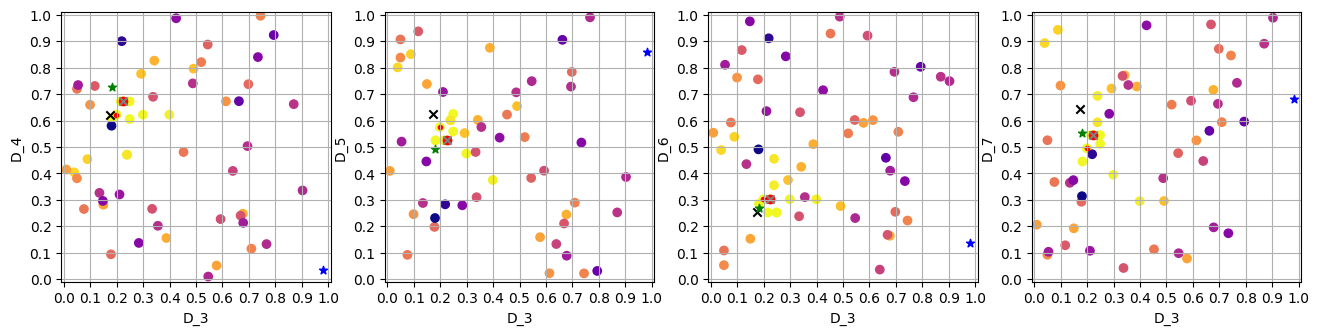

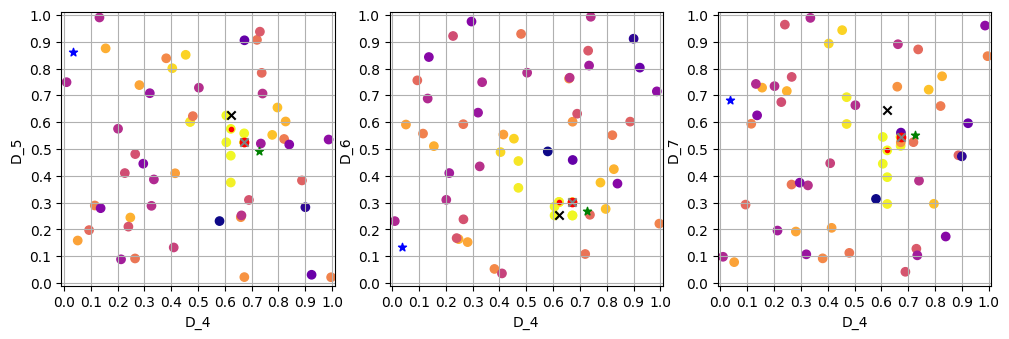

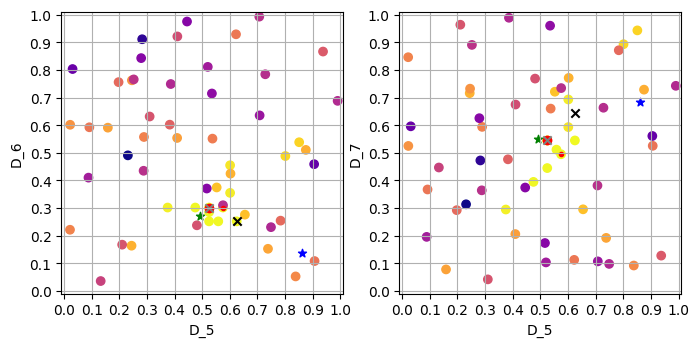

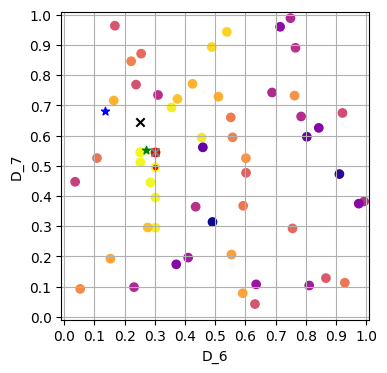

In [31]:
# which function to view
func = 8

# area to view around the sample to centre on, negative means don't zoom
viewSize = -0.2

# UCB params
beta = 0.5
# search bounds around the point to centre on
radius = 0.1

X, Y, order = capstone.loadData(func) # samples presorted best to worst

nDims = len(X[0])

# drop dimension 2 for problem 3
if func == 3 :
    X = np.delete(X, [2], 1)

centre = np.array([.5] * nDims)
nDims = len(X[0])

# centre GPR UCB search on this
#centreOn = centre #X[0] # the sample with the best value so far
centreOn = X[0] # the sample with the best value so far

# index of the last sample submitted
lastPointIndex = np.argmax(order)

# loneliest point
loneliest, _ = capstone.loneliestPoint(X)

turbo, _ = capstone.turboSearch(X, Y, None, radius)

gpr = GaussianProcessRegressor(copy_X_train=True, random_state=0)#, normalize_y=True)
gpr.fit(X, Y)
ucb, _ = capstone.gridSearch(1000000, centreOn, radius, gpr, beta)
dims = [x for x in range(nDims)]
print(f"UCB:\n{capstone.formatVec(ucb)}")
print(f"Lonely:\n{capstone.formatVec(loneliest)}")
print(f"Turbo:\n{capstone.formatVec(turbo)}")


for y in range(nDims-1):
    thisRow = dims[y+1:]
    nThisRow = len(thisRow)
    fig, axs = plt.subplots(1, nThisRow, figsize=(nThisRow*4, 4))
    if nThisRow == 1 :
        axs = [axs]
    for ax, x in zip(axs, thisRow) :
        ax.set_xticks(np.arange(0, 1.01, 0.1))
        ax.set_yticks(np.arange(0, 1.01, 0.1))
        ax.set_aspect('equal', 'box')
        # samples
        ax.scatter(X[:, y], X[:, x], c = Y, cmap="plasma")
        # best so far
        ax.scatter([X[0, y]], [X[0, x]], c = "red")
        # second best so far
        ax.scatter([X[1, y]], [X[1, x]], c = "red", marker='.')
        # ucb
        ax.scatter([ucb[y]], [ucb[x]], c = "black", marker='x')
        # lonliest
        ax.scatter([loneliest[y]], [loneliest[x]], c = "blue", marker='*')
        # most recent submission
        ax.scatter([X[lastPointIndex, y]], [X[lastPointIndex, x]], c = "grey", marker='x')
        ax.scatter([turbo[y]], [turbo[x]], c = "green", marker='*')
        ax.set_xlabel(f"D_{y}")
        ax.set_ylabel(f"D_{x}")
        ax.grid(which="both")
        
        if viewSize > 0 :
            c = centreOn[y] - viewSize
            ax.set_xlim([centreOn[y] - viewSize, centreOn[y] + viewSize])
            ax.set_ylim([centreOn[x] - viewSize, centreOn[x] + viewSize])
        else :
            ax.set_xlim([-0.01, 1.01])
            ax.set_ylim([-0.01, 1.01])